<a href="https://colab.research.google.com/github/johnatandin/curso-one/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importa√ß√£o dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


# Concatenando os dataframes
lojas =pd.concat([loja, loja2, loja3, loja4])



Pre√ßo        Frete  Avalia√ß√£o da compra  Quantidade de parcelas  \
count  9435.000000  9435.000000          9435.000000             9435.000000   
mean    622.309570    33.167002             4.014520                2.927398   
std     787.094508    41.973711             1.390518                2.802776   
min      10.070000     0.000000             1.000000                1.000000   
25%      73.610000     4.009423             3.000000                1.000000   
50%     295.350000    15.648481             5.000000                1.000000   
75%     884.405000    46.591030             5.000000                4.000000   
max    3969.380000   216.707633             5.000000               24.000000   

               lat          lon  
count  9435.000000  9435.000000  
mean    -20.534059   -47.171176  
std       5.399153     4.177887  
min     -30.170000   -70.550000  
25%     -22.250000   -48.790000  
50%     -22.190000   -48.790000  
75%     -18.100000   -44.380000  
max       1.990000   -36.590000

#1. An√°lise do faturamento


In [ ]:


# Calculando o faturamento total por dia, incluindo o frete
faturamento_diario = lojas.groupby('Data da Compra')[['Pre√ßo', 'Frete']].sum()

# Exibindo o faturamento di√°rio
print(faturamento_diario)

valor_total_por_dia = faturamento_diario['Pre√ßo'] + faturamento_diario['Frete']
print(valor_total_por_dia)

faturamento_diario['faturamento_total'] = faturamento_diario['Pre√ßo'] + faturamento_diario['Frete']

print()


                  Pre√ßo       Frete
Data da Compra                     
01/01/2020      2322.25  122.151621
01/01/2021      2521.72  138.239879
01/01/2022      5352.95  287.207229
01/01/2023      2898.58  161.700541
01/02/2020      2290.01  120.086834
...                 ...         ...
31/10/2021      1982.52  106.109225
31/10/2022      4511.67  241.213763
31/12/2020      3036.64  162.688406
31/12/2021      5861.39  309.085318
31/12/2022      3978.31  203.055799

[1185 rows x 2 columns]
Data da Compra
01/01/2020    2444.401621
01/01/2021    2659.959879
01/01/2022    5640.157229
01/01/2023    3060.280541
01/02/2020    2410.096834
                 ...     
31/10/2021    2088.629225
31/10/2022    4752.883763
31/12/2020    3199.328406
31/12/2021    6170.475318
31/12/2022    4181.365799
Length: 1185, dtype: float64



In [ ]:
# prompt: organize o faturamento por ano

import pandas as pd
# Convertendo a coluna 'Data da Compra' para o tipo datetime, se ainda n√£o estiver
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'])

# Extraindo o ano da coluna 'Data da Compra'
lojas['Ano'] = lojas['Data da Compra'].dt.year

# Agrupando por ano e somando o pre√ßo para obter o faturamento anual
faturamento_anual = lojas.groupby('Ano')['Pre√ßo'].sum()

# Imprimindo o faturamento anual
print("\nFaturamento por ano:")
faturamento_anual



Faturamento por ano:


<ipython-input-3-b72c884efa47>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'])


Ano
2020    1789272.37
2021    1898820.98
2022    1769933.73
2023     413463.71
Name: Pre√ßo, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

# Plotando o gr√°fico de barras
plt.figure(figsize=(10, 6))
faturamento_anual.plot(kind='bar', color='lightgreen')

plt.title('Faturamento Total por Ano')
plt.xlabel('Ano')
plt.ylabel('R$ Faturamento')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-5-e8523ba55133>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_anual, x='Ano', y='Pre√ßo', palette='viridis')


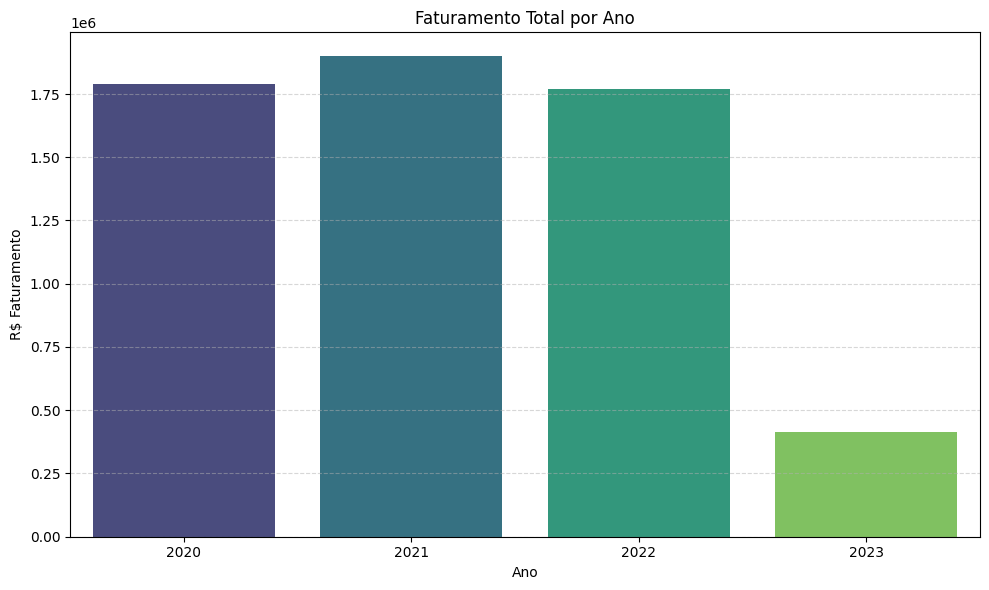

In [ ]:
import seaborn as sns

# Resetando √≠ndice para usar com seaborn
df_anual = faturamento_anual.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_anual, x='Ano', y='Pre√ßo', palette='viridis')

plt.title('Faturamento Total por Ano')
plt.xlabel('Ano')
plt.ylabel('R$ Faturamento')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: calcular o faturamento de cada loja , loja2 , loja3, loja4

# Calculando o faturamento de cada loja individualmente
faturamento_loja1 = loja['Pre√ßo'].sum()
faturamento_loja2 = loja2['Pre√ßo'].sum()
faturamento_loja3 = loja3['Pre√ßo'].sum()
faturamento_loja4 = loja4['Pre√ßo'].sum()

print(f"Faturamento da Loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento da Loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento da Loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento da Loja 4: R${faturamento_loja4:.2f}")



Faturamento da Loja 1: R$1534509.12
Faturamento da Loja 2: R$1488459.06
Faturamento da Loja 3: R$1464025.03
Faturamento da Loja 4: R$1384497.58


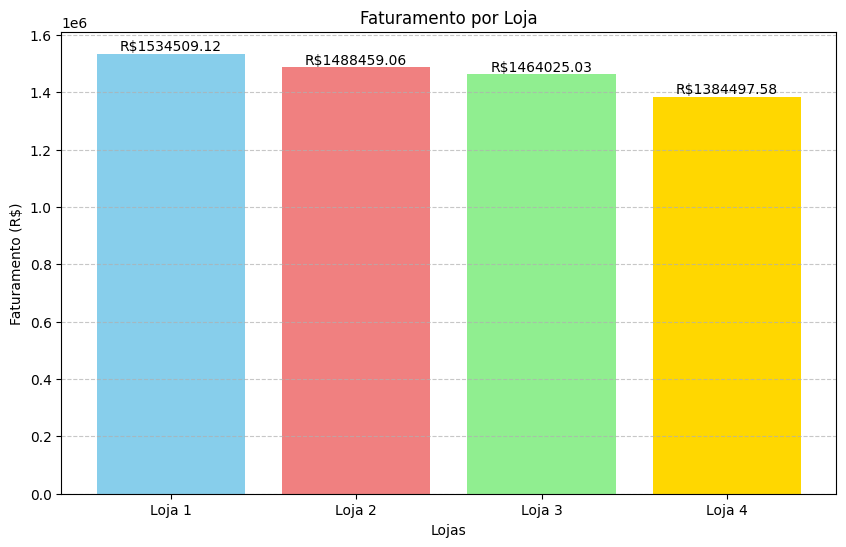

In [ ]:


import matplotlib.pyplot as plt

# Dados de faturamento (substitua pelos valores reais)
faturamento_loja1 = loja['Pre√ßo'].sum()
faturamento_loja2 = loja2['Pre√ßo'].sum()
faturamento_loja3 = loja3['Pre√ßo'].sum()
faturamento_loja4 = loja4['Pre√ßo'].sum()

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criando o gr√°fico de barras
plt.figure(figsize=(10, 6))
plt.bar(lojas, faturamentos, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando r√≥tulos de valor acima de cada barra
for i, v in enumerate(faturamentos):
    plt.text(i, v, f'R${v:.2f}', ha='center', va='bottom')

plt.show()


# 2. Vendas por Categoria


In [ ]:
# Agrupa por categoria e calcula a m√©dia da avalia√ß√£o
media_categoria = lojas.groupby("Categoria do Produto")["Avalia√ß√£o da compra"].mean().reset_index()

# Renomeia a coluna
media_categoria.columns = ["Categoria do Produto", "M√©dia da Avalia√ß√£o"]

# Ordena do maior para o menor
media_categoria = media_categoria.sort_values(by="M√©dia da Avalia√ß√£o", ascending=False)

# Exibe
print(media_categoria)

    Categoria do Produto  M√©dia da Avalia√ß√£o
0             brinquedos            4.070543
6                 moveis            4.033934
1       eletrodomesticos            4.014795
5                 livros            4.004043
4  instrumentos musicais            4.003984
2            eletronicos            3.992664
3        esporte e lazer            3.988320
7  utilidades domesticas            3.979452


<ipython-input-21-a66177888896>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


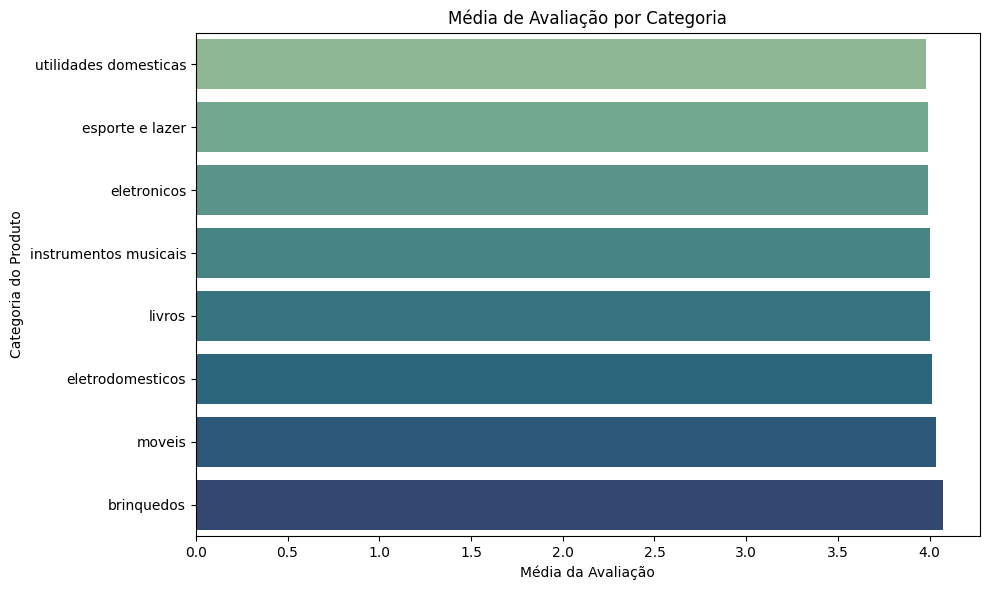

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a m√©dia de avalia√ß√£o por categoria
media_categoria = lojas.groupby("Categoria do Produto")["Avalia√ß√£o da compra"].mean().reset_index()
media_categoria.columns = ["Categoria do Produto", "M√©dia da Avalia√ß√£o"]
media_categoria = media_categoria.sort_values(by="M√©dia da Avalia√ß√£o", ascending=True)

# Criar o gr√°fico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=media_categoria,
    x="M√©dia da Avalia√ß√£o",
    y="Categoria do Produto",
    palette="crest"
)

plt.title("M√©dia de Avalia√ß√£o por Categoria")
plt.xlabel("M√©dia da Avalia√ß√£o")
plt.ylabel("Categoria do Produto")
plt.tight_layout()
plt.show()



# 3. M√©dia de Avalia√ß√£o das Lojas

In [ ]:
#LOJA1

# Calcula a m√©dia geral da avalia√ß√£o
media_geral = loja["Avalia√ß√£o da compra"].mean()

print(f"M√©dia geral de avalia√ß√£o da Loja 1: {media_geral:.2f}")


M√©dia geral de avalia√ß√£o da Loja 1: 3.98


In [ ]:
#LOJA2

# Calcula a m√©dia geral da avalia√ß√£o
media_geral = loja2["Avalia√ß√£o da compra"].mean()

print(f"M√©dia geral de avalia√ß√£o da Loja 2: {media_geral:.2f}")

M√©dia geral de avalia√ß√£o da Loja 2: 4.04


In [ ]:
#LOJA3

# Calcula a m√©dia geral da avalia√ß√£o
media_geral = loja3["Avalia√ß√£o da compra"].mean()

print(f"M√©dia geral de avalia√ß√£o da Loja 3: {media_geral:.2f}")

M√©dia geral de avalia√ß√£o da Loja 3: 4.05


In [ ]:
#LOJA4

# Calcula a m√©dia geral da avalia√ß√£o
media_geral = loja4["Avalia√ß√£o da compra"].mean()

print(f"M√©dia geral de avalia√ß√£o da Loja 4: {media_geral:.2f}")

M√©dia geral de avalia√ß√£o da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [ ]:
#de todas as lojas

# Conta quantas vezes cada produto foi vendido
vendas_por_produto = lojas["Produto"].value_counts().reset_index()
vendas_por_produto.columns = ["Produto", "Quantidade de Vendas"]

# Exibe os 10 mais vendidos
print("------------TODAS AS LOJAS-------------")
print("üîù Top 10 produtos mais vendidos:")
print(vendas_por_produto.head(10))

# Exibe os 10 menos vendidos
print("\nüîª Top 10 produtos menos vendidos:")
print(vendas_por_produto.tail(10))

------------TODAS AS LOJAS-------------
üîù Top 10 produtos mais vendidos:
                    Produto  Quantidade de Vendas
0                    C√¥moda                   210
1  Carrinho controle remoto                   206
2               Micro-ondas                   206
3                   Bateria                   203
4                 Cama king                   201
5        Secadora de roupas                   200
6       Modelagem preditiva                   200
7           Jogo de panelas                   200
8                  Cama box                   199
9          Blocos de montar                   199

üîª Top 10 produtos menos vendidos:
                        Produto  Quantidade de Vendas
41            Panela de press√£o                   172
42                   Smartwatch                   172
43                Jogo de copos                   169
44                     Poltrona                   168
45           Assistente virtual                   167
46  Ci√™nc

In [ ]:
#loja1

# Conta quantas vezes cada produto foi vendido
vendas_por_produto = loja["Produto"].value_counts().reset_index()
vendas_por_produto.columns = ["Produto", "Quantidade de Vendas"]

# Exibe os 10 mais vendidos
print("------------LOJA 1-------------")
print("üîù Top 10 produtos mais vendidos:")
print(vendas_por_produto.head(10))

# Exibe os 10 menos vendidos
print("\nüîª Top 10 produtos menos vendidos:")
print(vendas_por_produto.tail(10))

------------LOJA 1-------------
üîù Top 10 produtos mais vendidos:
              Produto  Quantidade de Vendas
0         Micro-ondas                    60
1       TV Led UHD 4K                    60
2       Guarda roupas                    60
3  Secadora de roupas                    58
4              C√¥moda                    56
5    Blocos de montar                    56
6    Bola de basquete                    55
7           Bicicleta                    54
8        Copo t√©rmico                    54
9           Geladeira                    54

üîª Top 10 produtos menos vendidos:
                        Produto  Quantidade de Vendas
41                  Boneca beb√™                    40
42               Mesa de jantar                    40
43               Dinossauro Rex                    40
44               Corda de pular                    40
45                      Mochila                    39
46  Ci√™ncia de dados com python                    39
47                     Pande

In [ ]:
#loja2

# Conta quantas vezes cada produto foi vendido
vendas_por_produto = loja2["Produto"].value_counts().reset_index()
vendas_por_produto.columns = ["Produto", "Quantidade de Vendas"]

# Exibe os 10 mais vendidos
print("------------LOJA 2-------------")
print("üîù Top 10 produtos mais vendidos:")
print(vendas_por_produto.head(10))

# Exibe os 10 menos vendidos
print("\nüîª Top 10 produtos menos vendidos:")
print(vendas_por_produto.tail(10))

------------LOJA 2-------------
üîù Top 10 produtos mais vendidos:
                    Produto  Quantidade de Vendas
0  Iniciando em programa√ß√£o                    65
1               Micro-ondas                    62
2                   Bateria                    61
3                    Viol√£o                    58
4                  Pandeiro                    58
5        Secadora de roupas                    57
6          Celular Plus X42                    55
7          Blocos de montar                    54
8             Guarda roupas                    54
9           Jogo de panelas                    52

üîª Top 10 produtos menos vendidos:
               Produto  Quantidade de Vendas
41      Dinossauro Rex                    42
42        Celular ABXY                    41
43            Smart TV                    40
44            Faqueiro                    39
45  Assistente virtual                    38
46      Fone de ouvido                    37
47            Poltrona    

In [ ]:
#loja3

# Conta quantas vezes cada produto foi vendido
vendas_por_produto = loja3["Produto"].value_counts().reset_index()
vendas_por_produto.columns = ["Produto", "Quantidade de Vendas"]

# Exibe os 10 mais vendidos
print("------------LOJA 3-------------")
print("üîù Top 10 produtos mais vendidos:")
print(vendas_por_produto.head(10))

# Exibe os 10 menos vendidos
print("\nüîª Top 10 produtos menos vendidos:")
print(vendas_por_produto.tail(10))

------------LOJA 3-------------
üîù Top 10 produtos mais vendidos:
                    Produto  Quantidade de Vendas
0             Kit banquetas                    57
1            Mesa de jantar                    56
2                 Cama king                    56
3           Jogo de panelas                    55
4                    C√¥moda                    55
5                  Smart TV                    54
6                     Fog√£o                    53
7            Corda de pular                    53
8       Modelagem preditiva                    53
9  Carrinho controle remoto                    52

üîª Top 10 produtos menos vendidos:
               Produto  Quantidade de Vendas
41            Faqueiro                    39
42         Boneca beb√™                    39
43             Headset                    39
44  Assistente virtual                    39
45        Copo t√©rmico                    38
46            Guitarra                    38
47       Jogo de copos   

In [ ]:
#loja4

# Conta quantas vezes cada produto foi vendido
vendas_por_produto = loja4["Produto"].value_counts().reset_index()
vendas_por_produto.columns = ["Produto", "Quantidade de Vendas"]

# Exibe os 10 mais vendidos
print("------------LOJA 4-------------")
print("üîù Top 10 produtos mais vendidos:")
print(vendas_por_produto.head(10))

# Exibe os 10 menos vendidos
print("\nüîª Top 10 produtos menos vendidos:")
print(vendas_por_produto.tail(10))

------------LOJA 4-------------
üîù Top 10 produtos mais vendidos:
                    Produto  Quantidade de Vendas
0                  Cama box                    62
1                  Faqueiro                    59
2   Dashboards com Power BI                    56
3                 Cama king                    56
4  Carrinho controle remoto                    55
5            Mesa de jantar                    55
6                    C√¥moda                    55
7                  Smart TV                    54
8          Blocos de montar                    54
9                  Pandeiro                    52

üîª Top 10 produtos menos vendidos:
                        Produto  Quantidade de Vendas
41        Cadeira de escrit√≥rio                    40
42                 Celular ABXY                    39
43            Xadrez de madeira                    39
44                   Smartwatch                    39
45           Lavadora de roupas                    38
46                

# 5. Frete M√©dio por Loja


In [ ]:
#TODAS AS LOJAS
# Calcula a m√©dia do frete
media_frete = lojas["Frete"].mean()
print("-------------TODAS AS LOJAS----------------")
print(f"M√©dia do valor do frete: R$ {media_frete:.2f}")

-------------TODAS AS LOJAS----------------
M√©dia do valor do frete: R$ 33.17


In [ ]:
# LOJA1
# Calcula a m√©dia do frete
media_frete = loja["Frete"].mean()
print("-------------TODAS AS LOJA 1----------------")
print(f"M√©dia do valor do frete: R$ {media_frete:.2f}")

-------------TODAS AS LOJA 1----------------
M√©dia do valor do frete: R$ 34.69


In [ ]:
# LOJA2
# Calcula a m√©dia do frete
media_frete = loja2["Frete"].mean()
print("-------------TODAS AS LOJA 2----------------")
print(f"M√©dia do valor do frete: R$ {media_frete:.2f}")

-------------TODAS AS LOJA 2----------------
M√©dia do valor do frete: R$ 33.62


In [ ]:
# LOJA3
# Calcula a m√©dia do frete
media_frete = loja3["Frete"].mean()
print("-------------TODAS AS LOJA 3----------------")
print(f"M√©dia do valor do frete: R$ {media_frete:.2f}")

-------------TODAS AS LOJA 3----------------
M√©dia do valor do frete: R$ 33.07


In [ ]:
# LOJA4
# Calcula a m√©dia do frete
media_frete = loja4["Frete"].mean()
print("-------------TODAS AS LOJA 4----------------")
print(f"M√©dia do valor do frete: R$ {media_frete:.2f}")

-------------TODAS AS LOJA 4----------------
M√©dia do valor do frete: R$ 31.28
